# Leis de Kepler

No século 16, Nicolau Copérnico propôs um modelo de movimento planetário centrado no Sol, em oposição ao modelo proposto na antiguidade por Ptolomeu, que tinha a Terra como centro do Universo. O modelo heliocêntrico de Copérnico ganhou força com a descrição do movimento planetário elaborada por Johannes Kepler no início do século 17. A descrição de Kepler se baseou em dados muitos precisos da posição do planeta Marte, compilados pelo astrônomo Tycho Brahe. de quem Kepler havia sido assistente. A descrição de Kepler é puramente empírica e uma explicação teórica para a dinâmica das órbitas planetárias surge apenas com a teoria da gravitação de Newton, mais tarde no século 17.

As Leis de Kepler do Movimento Planetário são:
1. Os planetas descrevem órbitas elípicas com Sol em dos focos da elipse.
2. A linha reta que une o planeta ao Sol varre áreas iguais em intervalos iguais.
3. O quadrado do período orbital dos planetas (a duração do 'ano') é proporcional ao cubo do semi-eixo maior da elipse que descreve sua órbita.

O semieixo maior das órbitas é a distância média do planeta ao Sol:

$\text{Semieixo_Maior} = \frac{(\text{Afelio} + \text{Perielio})}{2}$.

Pela terceira lei de Kepler:

$\text{Semieixo_Maior}^3 = k \cdot \text{Período_Orbital}^2$,

onde, $k$ é uma constante de proporcionalidade válida para todos os planetas do Sistema Solar.

Expressando as distâncias em Unidades Astronômicas e o tempo em anos ($k=1$):

$\text{Semieixo_Maior}^3 = \text{Período_Orbital}^2$.

Utilizaremos a tabela "Planetary Fact Sheet" para os parâmetros de corpos do Sistema Solar necessários às demonstrações.
Gráficos e computações numéricas serão executadas em Python 3. 

fonte: https://nssdc.gsfc.nasa.gov/planetary/factsheet/index.html



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sistema_solar = pd.DataFrame(pd.read_csv('planetary_factsheet.csv'))
sistema_solar = sistema_solar.set_index('parameter')
sistema_solar = sistema_solar.transpose()
sistema_solar

parameter,Mass (10**24kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10**6 km),Perihelion (10**6 km),Aphelion (10**6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C)
MERCURY,0.3300,4879.0,5427.0,3.7,4.3,1407.6,4222.6,57.900,46.000,69.800,88.0,47.4,7.0,0.205,0.034,167.0
VENUS,4.8700,12104.0,5243.0,8.9,10.4,-5832.5,2802.0,108.200,107.500,108.900,224.7,35.0,3.4,0.007,177.400,464.0
EARTH,5.9700,12756.0,5514.0,9.8,11.2,23.9,24.0,149.600,147.100,152.100,365.2,29.8,0.0,0.017,23.400,15.0
MOON,0.0730,3475.0,3340.0,1.6,2.4,655.7,708.7,0.384,0.363,0.406,27.3,1.0,5.1,0.055,6.700,-20.0
MARS,0.6420,6792.0,3933.0,3.7,5.0,24.6,24.7,227.900,206.600,249.200,687.0,24.1,1.9,0.094,25.200,-65.0
JUPITER,1898.0000,142984.0,1326.0,23.1,59.5,9.9,9.9,778.600,740.500,816.600,4331.0,13.1,1.3,0.049,3.100,-110.0
SATURN,568.0000,120536.0,687.0,9.0,35.5,10.7,10.7,1433.500,1352.600,1514.500,10747.0,9.7,2.5,0.057,26.700,-140.0
URANUS,86.8000,51118.0,1271.0,8.7,21.3,-17.2,17.2,2872.500,2741.300,3003.600,30589.0,6.8,0.8,0.046,97.800,-195.0
NEPTUNE,102.0000,49528.0,1638.0,11.0,23.5,16.1,16.1,4495.100,4444.500,4545.700,59800.0,5.4,1.8,0.011,28.300,-200.0
PLUTO,0.0146,2370.0,2095.0,0.7,1.3,-153.3,153.3,5906.400,4436.800,7375.900,90560.0,4.7,17.2,0.244,122.500,-225.0


### Visualização da Relação entre Distância Média ao Sol e Período Orbital.

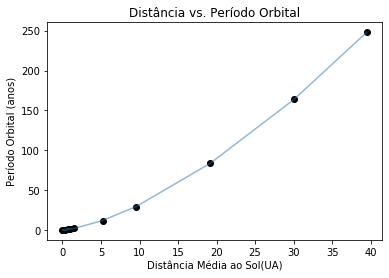

In [2]:
fig, periodo_distancia = plt.subplots()
periodo_distancia.set_title('Distância vs. Período Orbital')
periodo_distancia.set_xlabel('Distância Média ao Sol(UA)')
periodo_distancia.set_ylabel('Período Orbital (anos)')
plt.scatter(sistema_solar['Distance from Sun (10**6 km)']/149.6, sistema_solar['Orbital Period (days)']/365.2, color='k')
plt.plot(sistema_solar['Distance from Sun (10**6 km)']/149.6, sistema_solar['Orbital Period (days)']/365.2, alpha=0.5)

A relação entre o cubo da distância média e o quadrado do período orbital fica evidente quando plotamos estes dados num gráfico.

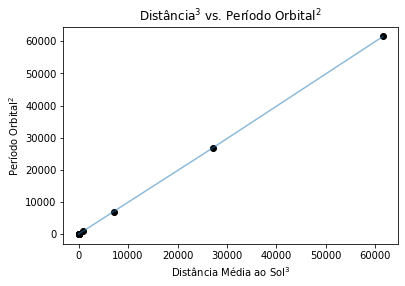

In [3]:
fig, periodo_distancia = plt.subplots()
periodo_distancia.set_title('Distância$^3$ vs. Período Orbital$^2$')
periodo_distancia.set_xlabel('Distância Média ao Sol$^3$')
periodo_distancia.set_ylabel('Período Orbital$^2$')
plt.scatter((sistema_solar['Distance from Sun (10**6 km)']/149.6)**3, (sistema_solar['Orbital Period (days)']/365.2)**2, color='k')
plt.plot((sistema_solar['Distance from Sun (10**6 km)']/149.6)**3, (sistema_solar['Orbital Period (days)']/365.2)**2, alpha=0.5)